<a href="https://colab.research.google.com/github/sudhakar2003/MNIST-Digit-Classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images to a 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2565 - accuracy: 0.9262 - val_loss: 0.1394 - val_accuracy: 0.9585
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.0962 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.0914 - val_accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0772 - val_accuracy: 0.9758


In [5]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9758
Test Accuracy: 0.9757999777793884


In [6]:
# Generate predictions
y_pred_prob = model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
report = classification_report(test_labels, y_pred)
print("Classification Report:\n", report)

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



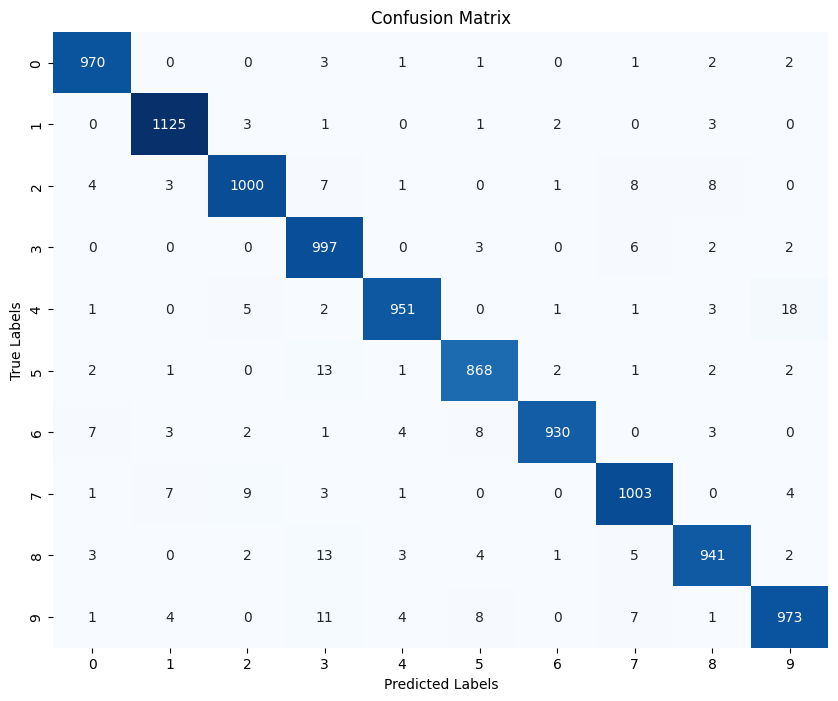

In [7]:
# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

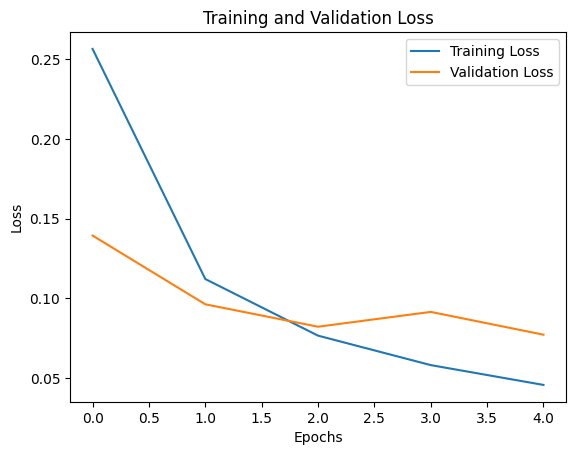

In [8]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

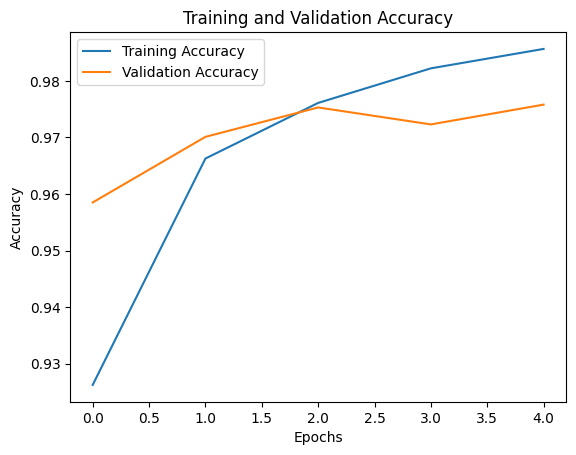

In [9]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()